In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [2]:
cuarentena_df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto74/paso_a_paso.csv?raw=true')

In [3]:
cuarentena_df

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,5


In [4]:
habitantes_df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto6/bulk/data.csv?raw=true')

In [5]:
habitantes_df

,Poblacion,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa
0,247552.0,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605
1,247552.0,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399
2,247552.0,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061
3,247552.0,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671
4,247552.0,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571
...,...,...,...,...,...,...,...,...,...,...
50676,NaN,-,2020/04/17,NaN,NaN,NaN,NaN,NaN,NaN,-
50677,NaN,-,2020/04/10,NaN,NaN,NaN,NaN,NaN,NaN,-
50678,NaN,-,2020/06/12,NaN,NaN,NaN,NaN,NaN,NaN,-
50679,NaN,71.0,2020/08/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
habitantes_df['Date'] = pd.to_datetime(habitantes_df['Fecha'])

In [7]:
habitantes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50681 entries, 0 to 50680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Poblacion          48440 non-null  float64       
 1   Casos Confirmados  50681 non-null  object        
 2   Fecha              50680 non-null  object        
 3   Region ID          48301 non-null  float64       
 4   Region             48301 non-null  object        
 5   Provincia ID       48301 non-null  float64       
 6   Provincia          48301 non-null  object        
 7   Comuna ID          48301 non-null  float64       
 8   Comuna             48301 non-null  object        
 9   Tasa               48857 non-null  object        
 10  Date               50680 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 4.3+ MB


In [8]:
habitantes_df = habitantes_df.dropna()

In [9]:
cuarentena_df['Comuna_id'] = cuarentena_df['codigo_comuna'].astype(float)
cuarentena_df

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Comuna_id
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15101.0
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,15101.0
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15102.0
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,15202.0
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,15201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12101.0
382,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12103.0
383,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12104.0
384,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,5,12303.0


In [10]:
combinacion = pd.merge(left=cuarentena_df , right = habitantes_df , how='left' , left_on = 'Comuna_id', right_on='Comuna ID')
combinacion

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa,Date
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605,2020-08-24
1,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399,2021-05-21
2,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061,2021-01-01
3,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671,2021-06-11
4,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571,2020-12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,2.0,2020/10/30,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,195.88638589618023,2020-10-30
53480,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/04/17,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-17
53481,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/04/10,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-04-10
53482,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,0.0,2020/06/12,12.0,Magallanes y de la Antártica Chilena,124.0,Última Esperanza,12402.0,Torres del Paine,0.0,2020-06-12


In [11]:
combinacion = combinacion.drop(['Casos Confirmados', 'Fecha', 'Region ID',"Provincia ID","Provincia","Comuna ID","Comuna","Tasa","Date","Region"], axis=1)
combinacion

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Comuna_id,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
1,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
2,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
3,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
4,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53479,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53480,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53481,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0
53482,12,Magallanes,12402,Torres del Paine,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12402.0,1021.0


In [12]:
combinacion = combinacion.drop_duplicates()
combinacion

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,Comuna_id,Poblacion
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15101.0,247552.0
140,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,3,3,3,3,3,3,3,3,15101.0,247552.0
280,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15102.0,1233.0
420,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,15202.0,810.0
560,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,3,3,3,3,3,3,3,3,15201.0,2515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52784,12,Magallanes,12101,Punta Arenas,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12101.0,141984.0
52924,12,Magallanes,12103,Río Verde,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12103.0,211.0
53064,12,Magallanes,12104,San Gregorio,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12104.0,681.0
53204,12,Magallanes,12303,Timaukel,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,5,12303.0,282.0


In [13]:
com = pd.melt(combinacion, id_vars = ['codigo_region','region_residencia',"codigo_comuna","comuna_residencia","zona","Comuna_id",'Poblacion'], var_name = 'Fecha', value_name = "Fase")
com

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase
0,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,15201.0,2515.0,2020-07-28,3
...,...,...,...,...,...,...,...,...,...
168291,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2021-10-06,5
168292,12,Magallanes,12103,Río Verde,Total,12103.0,211.0,2021-10-06,5
168293,12,Magallanes,12104,San Gregorio,Total,12104.0,681.0,2021-10-06,5
168294,12,Magallanes,12303,Timaukel,Total,12303.0,282.0,2021-10-06,5


In [14]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168296 entries, 0 to 168295
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codigo_region      168296 non-null  int64  
 1   region_residencia  168296 non-null  object 
 2   codigo_comuna      168296 non-null  int64  
 3   comuna_residencia  168296 non-null  object 
 4   zona               168296 non-null  object 
 5   Comuna_id          168296 non-null  float64
 6   Poblacion          166552 non-null  float64
 7   Fecha              168296 non-null  object 
 8   Fase               168296 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 11.6+ MB


In [15]:
com['Date'] = pd.to_datetime(com['Fecha'])
com

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
0,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2020-07-28,3,2020-07-28
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1,2020-07-28
2,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2020-07-28,3,2020-07-28
3,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2020-07-28,3,2020-07-28
4,15,Arica y Parinacota,15201,Putre,Total,15201.0,2515.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168291,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2021-10-06,5,2021-10-06
168292,12,Magallanes,12103,Río Verde,Total,12103.0,211.0,2021-10-06,5,2021-10-06
168293,12,Magallanes,12104,San Gregorio,Total,12104.0,681.0,2021-10-06,5,2021-10-06
168294,12,Magallanes,12303,Timaukel,Total,12303.0,282.0,2021-10-06,5,2021-10-06


In [16]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168296 entries, 0 to 168295
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   codigo_region      168296 non-null  int64         
 1   region_residencia  168296 non-null  object        
 2   codigo_comuna      168296 non-null  int64         
 3   comuna_residencia  168296 non-null  object        
 4   zona               168296 non-null  object        
 5   Comuna_id          168296 non-null  float64       
 6   Poblacion          166552 non-null  float64       
 7   Fecha              168296 non-null  object        
 8   Fase               168296 non-null  int64         
 9   Date               168296 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 12.8+ MB


In [17]:
Arica = com[com["codigo_region"] == 15]
Arica

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
0,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2020-07-28,3,2020-07-28
1,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2020-07-28,1,2020-07-28
2,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2020-07-28,3,2020-07-28
3,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2020-07-28,3,2020-07-28
4,15,Arica y Parinacota,15201,Putre,Total,15201.0,2515.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167910,15,Arica y Parinacota,15101,Arica,Rural,15101.0,247552.0,2021-10-06,3,2021-10-06
167911,15,Arica y Parinacota,15101,Arica,Urbana,15101.0,247552.0,2021-10-06,3,2021-10-06
167912,15,Arica y Parinacota,15102,Camarones,Total,15102.0,1233.0,2021-10-06,3,2021-10-06
167913,15,Arica y Parinacota,15202,General Lagos,Total,15202.0,810.0,2021-10-06,4,2021-10-06


In [20]:
R_arica = Arica[Arica["Fase"] == 1]
R_arica = R_arica.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)

In [21]:
R_arica

,Poblacion,Date
1,247552.0,2020-07-28
387,247552.0,2020-07-29
773,247552.0,2020-07-30
1159,247552.0,2020-07-31
1545,247552.0,2020-08-01
...,...,...
123907,247552.0,2021-06-14
124292,247552.0,2021-06-15
124293,247552.0,2021-06-15
124678,247552.0,2021-06-16


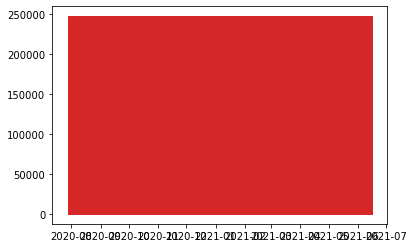

In [50]:
fig, ax = plt.subplots()
ax.fill_between(R_arica["Date"], R_arica["Poblacion"], color = 'tab:red')
plt.show()

In [24]:
Tarapaca = com[com["codigo_region"] == 1]
Tarapaca

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
5,1,Tarapacá,1107,Alto Hospicio,Total,1107.0,129999.0,2020-07-28,1,2020-07-28
6,1,Tarapacá,1402,Camiña,Total,1402.0,1375.0,2020-07-28,3,2020-07-28
7,1,Tarapacá,1403,Colchane,Total,1403.0,1583.0,2020-07-28,3,2020-07-28
8,1,Tarapacá,1404,Huara,Total,1404.0,3000.0,2020-07-28,3,2020-07-28
9,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2020-07-28,1,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167918,1,Tarapacá,1404,Huara,Total,1404.0,3000.0,2021-10-06,4,2021-10-06
167919,1,Tarapacá,1101,Iquique,Total,1101.0,223463.0,2021-10-06,3,2021-10-06
167920,1,Tarapacá,1405,Pica,Total,1405.0,5958.0,2021-10-06,4,2021-10-06
167921,1,Tarapacá,1401,Pozo Almonte,Rural,1401.0,17395.0,2021-10-06,4,2021-10-06


In [25]:
R_tarapaca = Tarapaca[Tarapaca["Fase"] == 1]
R_tarapaca = R_tarapaca.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_tarapaca

,Poblacion,Date
5,129999.0,2020-07-28
9,223463.0,2020-07-28
12,17395.0,2020-07-28
391,129999.0,2020-07-29
395,223463.0,2020-07-29
...,...,...
111949,223463.0,2021-05-14
112331,129999.0,2021-05-15
112335,223463.0,2021-05-15
112717,129999.0,2021-05-16


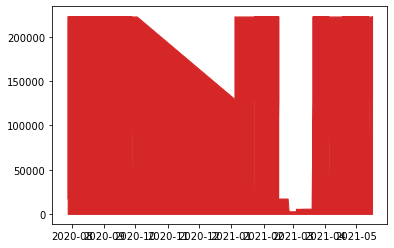

In [49]:
fig, aa = plt.subplots()
aa.fill_between(R_tarapaca["Date"], R_tarapaca["Poblacion"], color = 'tab:red')
plt.show()

In [33]:
Antofagasta = com[com["codigo_region"] == 2]
Antofagasta

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
13,2,Antofagasta,2101,Antofagasta,Rural,2101.0,425725.0,2020-07-28,3,2020-07-28
14,2,Antofagasta,2101,Antofagasta,Urbana,2101.0,425725.0,2020-07-28,1,2020-07-28
15,2,Antofagasta,2201,Calama,Total,2201.0,190336.0,2020-07-28,1,2020-07-28
16,2,Antofagasta,2302,María Elena,Total,2302.0,6814.0,2020-07-28,3,2020-07-28
17,2,Antofagasta,2102,Mejillones,Rural,2102.0,14776.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167930,2,Antofagasta,2203,San Pedro de Atacama,Total,2203.0,10434.0,2021-10-06,4,2021-10-06
167931,2,Antofagasta,2103,Sierra Gorda,Total,2103.0,1746.0,2021-10-06,4,2021-10-06
167932,2,Antofagasta,2104,Taltal,Total,2104.0,13657.0,2021-10-06,4,2021-10-06
167933,2,Antofagasta,2301,Tocopilla,Rural,2301.0,28079.0,2021-10-06,3,2021-10-06


In [34]:
R_antofagasta = Antofagasta[Antofagasta["Fase"] == 1]
R_antofagasta = R_antofagasta.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_antofagasta

,Poblacion,Date
14,425725.0,2020-07-28
15,190336.0,2020-07-28
18,14776.0,2020-07-28
24,28079.0,2020-07-28
400,425725.0,2020-07-29
...,...,...
108481,190336.0,2021-05-05
108867,190336.0,2021-05-06
109253,190336.0,2021-05-07
109639,190336.0,2021-05-08


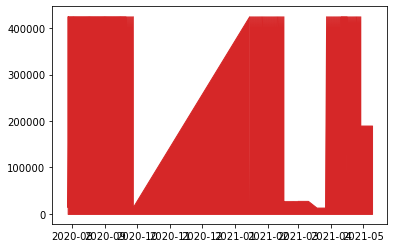

In [48]:
fig, ab = plt.subplots()
ab.fill_between(R_antofagasta["Date"], R_antofagasta["Poblacion"], color = 'tab:red')
plt.show()

In [36]:
Atacama = com[com["codigo_region"] == 3]
Atacama

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
25,3,Atacama,3302,Alto del Carmen,Total,3302.0,5729.0,2020-07-28,3,2020-07-28
26,3,Atacama,3102,Caldera,Total,3102.0,19426.0,2020-07-28,3,2020-07-28
27,3,Atacama,3201,Chañaral,Total,3201.0,13164.0,2020-07-28,3,2020-07-28
28,3,Atacama,3101,Copiapó,Total,3101.0,171766.0,2020-07-28,1,2020-07-28
29,3,Atacama,3202,Diego de Almagro,Total,3202.0,14358.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167939,3,Atacama,3202,Diego de Almagro,Total,3202.0,14358.0,2021-10-06,4,2021-10-06
167940,3,Atacama,3303,Freirina,Total,3303.0,7681.0,2021-10-06,4,2021-10-06
167941,3,Atacama,3304,Huasco,Total,3304.0,11264.0,2021-10-06,4,2021-10-06
167942,3,Atacama,3103,Tierra Amarilla,Total,3103.0,14312.0,2021-10-06,4,2021-10-06


In [37]:
R_atacama = Atacama[Atacama["Fase"] == 1]
R_atacama = R_atacama.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_atacama

,Poblacion,Date
28,171766.0,2020-07-28
414,171766.0,2020-07-29
800,171766.0,2020-07-30
1186,171766.0,2020-07-31
1572,171766.0,2020-08-01
...,...,...
140150,14312.0,2021-07-26
140536,14312.0,2021-07-27
140922,14312.0,2021-07-28
141308,14312.0,2021-07-29


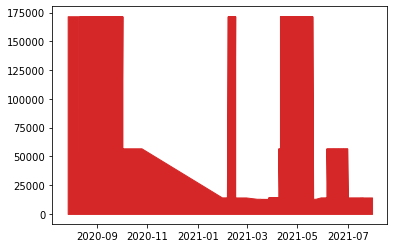

In [47]:
fig, ac = plt.subplots()
ac.fill_between(R_atacama["Date"], R_atacama["Poblacion"], color = 'tab:red')
plt.show()

In [39]:
Coquimbo = com[com["codigo_region"] == 4]
Coquimbo

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
34,4,Coquimbo,4103,Andacollo,Total,4103.0,11791.0,2020-07-28,3,2020-07-28
35,4,Coquimbo,4202,Canela,Total,4202.0,9546.0,2020-07-28,3,2020-07-28
36,4,Coquimbo,4302,Combarbalá,Total,4302.0,13884.0,2020-07-28,3,2020-07-28
37,4,Coquimbo,4102,Coquimbo,Total,4102.0,256735.0,2020-07-28,3,2020-07-28
38,4,Coquimbo,4201,Illapel,Total,4201.0,32801.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167954,4,Coquimbo,4105,Paihuano,Total,4105.0,4675.0,2021-10-06,4,2021-10-06
167955,4,Coquimbo,4304,Punitaqui,Total,4304.0,12165.0,2021-10-06,4,2021-10-06
167956,4,Coquimbo,4305,Río Hurtado,Total,4305.0,4372.0,2021-10-06,4,2021-10-06
167957,4,Coquimbo,4204,Salamanca,Total,4204.0,29110.0,2021-10-06,4,2021-10-06


In [40]:
R_coquimbo = Coquimbo[Coquimbo["Fase"] == 1]
R_coquimbo = R_coquimbo.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_coquimbo

,Poblacion,Date
423,256735.0,2020-07-29
426,249656.0,2020-07-29
809,256735.0,2020-07-30
812,249656.0,2020-07-30
1195,256735.0,2020-07-31
...,...,...
135534,29741.0,2021-07-14
135920,29741.0,2021-07-15
136306,29741.0,2021-07-16
136692,29741.0,2021-07-17


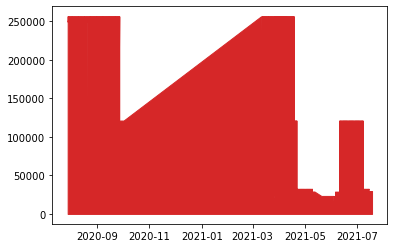

In [46]:
fig, ad = plt.subplots()
ad.fill_between(R_coquimbo["Date"], R_coquimbo["Poblacion"], color = 'tab:red')
plt.show()

In [42]:
Valparaiso = com[com["codigo_region"] == 5]
Valparaiso

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
49,5,Valparaíso,5602,Algarrobo,Total,5602.0,15174.0,2020-07-28,3,2020-07-28
50,5,Valparaíso,5402,Cabildo,Total,5402.0,20663.0,2020-07-28,3,2020-07-28
51,5,Valparaíso,5502,La Calera,Total,5502.0,53591.0,2020-07-28,1,2020-07-28
52,5,Valparaíso,5302,Calle Larga,Total,5302.0,16482.0,2020-07-28,3,2020-07-28
53,5,Valparaíso,5603,Cartagena,Total,5603.0,25357.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
167992,5,Valparaíso,5606,Santo Domingo,Total,5606.0,11934.0,2021-10-06,4,2021-10-06
167993,5,Valparaíso,5101,Valparaiso,Total,5101.0,315732.0,2021-10-06,4,2021-10-06
167994,5,Valparaíso,5804,Villa Alemana,Total,5804.0,139310.0,2021-10-06,4,2021-10-06
167995,5,Valparaíso,5109,Viña del Mar,Total,5109.0,361371.0,2021-10-06,4,2021-10-06


In [43]:
R_valparaiso = Valparaiso[Valparaiso["Fase"] == 1]
R_valparaiso = R_valparaiso.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_valparaiso

,Poblacion,Date
51,53591.0,2020-07-28
62,25321.0,2020-07-28
66,68093.0,2020-07-28
74,97572.0,2020-07-28
83,315732.0,2020-07-28
...,...,...
137481,26533.0,2021-07-19
137867,26533.0,2021-07-20
138253,26533.0,2021-07-21
138639,26533.0,2021-07-22


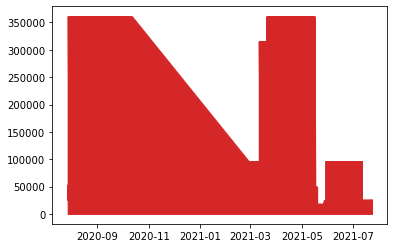

In [45]:
fig, ae = plt.subplots()
ae.fill_between(R_valparaiso["Date"], R_valparaiso["Poblacion"], color = 'tab:red')
plt.show()

In [51]:
Libertador = com[com["codigo_region"] == 6]
Libertador

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
142,6,O’Higgins,6302,Chépica,Total,6302.0,15925.0,2020-07-28,3,2020-07-28
143,6,O’Higgins,6303,Chimbarongo,Total,6303.0,37696.0,2020-07-28,3,2020-07-28
144,6,O’Higgins,6102,Codegua,Total,6102.0,14096.0,2020-07-28,3,2020-07-28
145,6,O’Higgins,6103,Coinco,Total,6103.0,7831.0,2020-07-28,3,2020-07-28
146,6,O’Higgins,6104,Coltauco,Total,6104.0,21263.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168080,6,O’Higgins,6115,Rengo,Total,6115.0,63710.0,2021-10-06,4,2021-10-06
168081,6,O’Higgins,6116,Requínoa,Total,6116.0,30371.0,2021-10-06,4,2021-10-06
168082,6,O’Higgins,6301,San Fernando,Total,6301.0,78642.0,2021-10-06,4,2021-10-06
168083,6,O’Higgins,6117,San Vicente,Total,6117.0,50617.0,2021-10-06,4,2021-10-06


In [52]:
R_libertador = Libertador[Libertador["Fase"] == 1]
R_libertador = R_libertador.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_libertador

,Poblacion,Date
148,36504.0,2020-07-28
153,59913.0,2020-07-28
169,265211.0,2020-07-28
170,63710.0,2020-07-28
534,36504.0,2020-07-29
...,...,...
132170,6904.0,2021-07-05
132540,15925.0,2021-07-06
132556,6904.0,2021-07-06
132926,15925.0,2021-07-07


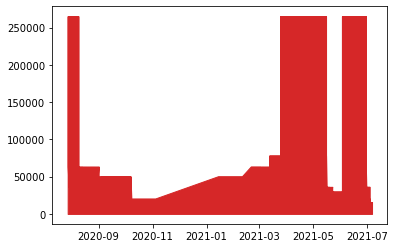

In [53]:
fig, af = plt.subplots()
af.fill_between(R_libertador["Date"], R_libertador["Poblacion"], color = 'tab:red')
plt.show()

In [54]:
Maule = com[com["codigo_region"] == 7]
Maule

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
175,7,Maule,7201,Cauquenes,Total,7201.0,44143.0,2020-07-28,3,2020-07-28
176,7,Maule,7202,Chanco,Total,7202.0,9331.0,2020-07-28,3,2020-07-28
177,7,Maule,7402,Colbún,Total,7402.0,22565.0,2020-07-28,3,2020-07-28
178,7,Maule,7102,Constitución,Total,7102.0,50348.0,2020-07-28,3,2020-07-28
179,7,Maule,7103,Curepto,Total,7103.0,9426.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168114,7,Maule,7101,Talca,Urbana,7101.0,236724.0,2021-10-06,4,2021-10-06
168115,7,Maule,7308,Teno,Total,7308.0,30850.0,2021-10-06,4,2021-10-06
168116,7,Maule,7309,Vichuquén,Total,7309.0,4381.0,2021-10-06,4,2021-10-06
168117,7,Maule,7407,Villa Alegre,Total,7407.0,17512.0,2021-10-06,4,2021-10-06


In [55]:
R_maule = Maule[Maule["Fase"] == 1]
R_maule = R_maule.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_maule

,Poblacion,Date
181,163626.0,2020-07-28
567,163626.0,2020-07-29
953,163626.0,2020-07-30
1339,163626.0,2020-07-31
1725,163626.0,2020-08-01
...,...,...
137599,10222.0,2021-07-19
137985,10222.0,2021-07-20
138371,10222.0,2021-07-21
138757,10222.0,2021-07-22


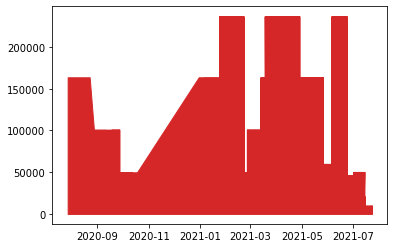

In [56]:
fig, ag = plt.subplots()
ag.fill_between(R_maule["Date"], R_maule["Poblacion"], color = 'tab:red')
plt.show()

In [57]:
Biobio = com[com["codigo_region"] == 8]
Biobio

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
232,8,Biobío,8314,Alto Biobío,Total,8314.0,6775.0,2020-07-28,3,2020-07-28
233,8,Biobío,8302,Antuco,Total,8302.0,4306.0,2020-07-28,3,2020-07-28
234,8,Biobío,8202,Arauco,Total,8202.0,38679.0,2020-07-28,3,2020-07-28
235,8,Biobío,8303,Cabrero,Rural,8303.0,30725.0,2020-07-28,3,2020-07-28
236,8,Biobío,8303,Cabrero,Urbana,8303.0,30725.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168172,8,Biobío,8110,Talcahuano,Total,8110.0,158345.0,2021-10-06,4,2021-10-06
168173,8,Biobío,8207,Tirúa,Total,8207.0,11019.0,2021-10-06,4,2021-10-06
168174,8,Biobío,8111,Tomé,Total,8111.0,58729.0,2021-10-06,4,2021-10-06
168175,8,Biobío,8312,Tucapel,Total,8312.0,15205.0,2021-10-06,4,2021-10-06


In [58]:
R_biobio = Biobio[Biobio["Fase"] == 1]
R_biobio = R_biobio.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_biobio

,Poblacion,Date
9519,49865.0,2020-08-21
9528,58729.0,2020-08-21
9905,49865.0,2020-08-22
9914,58729.0,2020-08-22
10291,49865.0,2020-08-23
...,...,...
140381,11019.0,2021-07-26
140767,11019.0,2021-07-27
141153,11019.0,2021-07-28
141539,11019.0,2021-07-29


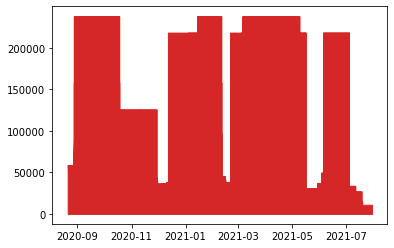

In [59]:
fig, ah = plt.subplots()
ah.fill_between(R_biobio["Date"], R_biobio["Poblacion"], color = 'tab:red')
plt.show()

In [60]:
Araucania = com[com["codigo_region"] == 9]
Araucania

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
267,9,La Araucanía,9201,Angol,Total,9201.0,56058.0,2020-07-28,4,2020-07-28
268,9,La Araucanía,9102,Carahue,Total,9102.0,25486.0,2020-07-28,4,2020-07-28
269,9,La Araucanía,9121,Cholchol,Total,9121.0,12341.0,2020-07-28,4,2020-07-28
270,9,La Araucanía,9202,Collipulli,Total,9202.0,26148.0,2020-07-28,4,2020-07-28
271,9,La Araucanía,9103,Cunco,Total,9103.0,18055.0,2020-07-28,4,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168208,9,La Araucanía,9118,Toltén,Urbana,9118.0,10055.0,2021-10-06,4,2021-10-06
168209,9,La Araucanía,9210,Traiguén,Total,9210.0,19314.0,2021-10-06,4,2021-10-06
168210,9,La Araucanía,9211,Victoria,Total,9211.0,35467.0,2021-10-06,4,2021-10-06
168211,9,La Araucanía,9119,Vilcún,Total,9119.0,30766.0,2021-10-06,4,2021-10-06


In [61]:
R_araucania = Araucania[Araucania["Fase"] == 1]
R_araucania = R_araucania.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_araucania

,Poblacion,Date
23049,8458.0,2020-09-25
23055,11049.0,2020-09-25
23070,15786.0,2020-09-25
23435,8458.0,2020-09-26
23441,11049.0,2020-09-26
...,...,...
141958,15786.0,2021-07-30
142329,11049.0,2021-07-31
142715,11049.0,2021-08-01
143101,11049.0,2021-08-02


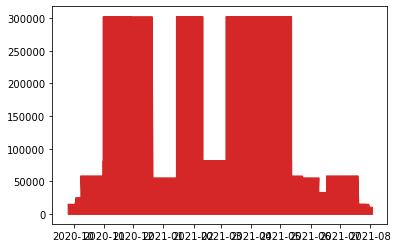

In [62]:
fig, ai = plt.subplots()
ai.fill_between(R_araucania["Date"], R_araucania["Poblacion"], color = 'tab:red')
plt.show()

In [63]:
Lagos = com[com["codigo_region"] == 10]
Lagos

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
316,10,Los Lagos,10202,Ancud,Rural,10202.0,42458.0,2020-07-28,3,2020-07-28
317,10,Los Lagos,10202,Ancud,Urbana,10202.0,42458.0,2020-07-28,3,2020-07-28
318,10,Los Lagos,10102,Calbuco,Total,10102.0,36744.0,2020-07-28,3,2020-07-28
319,10,Los Lagos,10201,Castro,Total,10201.0,47607.0,2020-07-28,3,2020-07-28
320,10,Los Lagos,10401,Chaitén,Total,10401.0,5020.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168259,10,Los Lagos,10210,Quinchao,Urbana,10210.0,8298.0,2021-10-06,4,2021-10-06
168260,10,Los Lagos,10305,Río Negro,Rural,10305.0,14275.0,2021-10-06,4,2021-10-06
168261,10,Los Lagos,10305,Río Negro,Urbana,10305.0,14275.0,2021-10-06,4,2021-10-06
168262,10,Los Lagos,10306,San Juan de la Costa,Total,10306.0,7639.0,2021-10-06,4,2021-10-06


In [71]:
R_lagos = Lagos[Lagos["Fase"] == 1]
R_lagos = R_lagos.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_lagos = R_lagos.dropna()
R_lagos

,Poblacion,Date
723,269398.0,2020-07-29
1109,269398.0,2020-07-30
1495,269398.0,2020-07-31
1881,269398.0,2020-08-01
2267,269398.0,2020-08-02
...,...,...
138539,14275.0,2021-07-21
138924,14275.0,2021-07-22
138925,14275.0,2021-07-22
139310,14275.0,2021-07-23


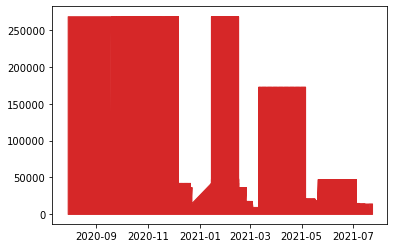

In [72]:
fig, aj = plt.subplots()
aj.fill_between(R_lagos["Date"], R_lagos["Poblacion"], color = 'tab:red')
plt.show()

In [66]:
Aysen = com[com["codigo_region"] == 11]
Aysen

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
354,11,Aysén,11201,Aysén,Urbana,11201.0,NaN,2020-07-28,4,2020-07-28
355,11,Aysén,11201,Aysén,Puerto Chacabuco,11201.0,NaN,2020-07-28,4,2020-07-28
356,11,Aysén,11201,Aysén,Isla Las Huichas,11201.0,NaN,2020-07-28,4,2020-07-28
357,11,Aysén,11201,Aysén,Rural,11201.0,NaN,2020-07-28,4,2020-07-28
358,11,Aysén,11401,Chile Chico,Rural,11401.0,5121.0,2020-07-28,4,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168279,11,Aysén,11102,Lago Verde,Total,11102.0,920.0,2021-10-06,4,2021-10-06
168280,11,Aysén,11302,O'Higgins,Total,11302.0,661.0,2021-10-06,4,2021-10-06
168281,11,Aysén,11402,Río Ibáñez,Resto,11402.0,2699.0,2021-10-06,4,2021-10-06
168282,11,Aysén,11402,Río Ibáñez,Cerro Castillo,11402.0,2699.0,2021-10-06,4,2021-10-06


In [69]:
R_aysen = Aysen[Aysen["Fase"] == 1]
R_aysen = R_aysen.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_aysen = R_aysen.dropna()
R_aysen

,Poblacion,Date
23140,61210.0,2020-09-25
23141,61210.0,2020-09-25
23526,61210.0,2020-09-26
23527,61210.0,2020-09-26
23912,61210.0,2020-09-27
...,...,...
132764,61210.0,2021-07-06
132765,61210.0,2021-07-06
133145,5828.0,2021-07-07
133150,61210.0,2021-07-07


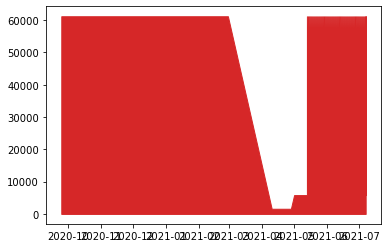

In [70]:
fig, ak = plt.subplots()
ak.fill_between(R_aysen["Date"], R_aysen["Poblacion"], color = 'tab:red')
plt.show()

In [73]:
Magallanes = com[com["codigo_region"] == 12]
Magallanes

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
374,12,Magallanes,12202,Antártica,Total,12202.0,137.0,2020-07-28,3,2020-07-28
375,12,Magallanes,12201,Cabo de Hornos,Resto,12201.0,1983.0,2020-07-28,3,2020-07-28
376,12,Magallanes,12201,Cabo de Hornos,Puerto Williams,12201.0,1983.0,2020-07-28,3,2020-07-28
377,12,Magallanes,12102,Laguna Blanca,Total,12102.0,264.0,2020-07-28,3,2020-07-28
378,12,Magallanes,12401,Natales,Total,12401.0,23782.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168291,12,Magallanes,12101,Punta Arenas,Total,12101.0,141984.0,2021-10-06,5,2021-10-06
168292,12,Magallanes,12103,Río Verde,Total,12103.0,211.0,2021-10-06,5,2021-10-06
168293,12,Magallanes,12104,San Gregorio,Total,12104.0,681.0,2021-10-06,5,2021-10-06
168294,12,Magallanes,12303,Timaukel,Total,12303.0,282.0,2021-10-06,5,2021-10-06


In [74]:
R_magallanes = Magallanes[Magallanes["Fase"] == 1]
R_magallanes = R_magallanes.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_magallanes = R_magallanes.dropna()
R_magallanes

,Poblacion,Date
9645,141984.0,2020-08-21
10031,141984.0,2020-08-22
10417,141984.0,2020-08-23
10803,141984.0,2020-08-24
11189,141984.0,2020-08-25
...,...,...
124285,7323.0,2021-06-14
124670,23782.0,2021-06-15
124671,7323.0,2021-06-15
125056,23782.0,2021-06-16


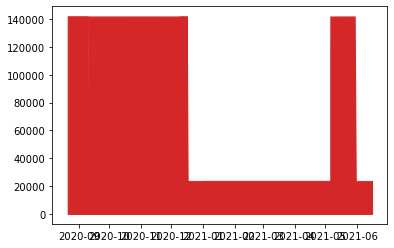

In [75]:
fig, al = plt.subplots()
al.fill_between(R_magallanes["Date"], R_magallanes["Poblacion"], color = 'tab:red')
plt.show()

In [76]:
Metropolitana = com[com["codigo_region"] == 13]
Metropolitana

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
87,13,Metropolitana,13502,Alhué,Total,13502.0,7405.0,2020-07-28,3,2020-07-28
88,13,Metropolitana,13402,Buin,Total,13402.0,109641.0,2020-07-28,1,2020-07-28
89,13,Metropolitana,13403,Calera de Tango,Total,13403.0,28525.0,2020-07-28,1,2020-07-28
90,13,Metropolitana,13102,Cerrillos,Total,13102.0,88956.0,2020-07-28,1,2020-07-28
91,13,Metropolitana,13103,Cerro Navia,Total,13103.0,142465.0,2020-07-28,1,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168047,13,Metropolitana,13131,San Ramón,Total,13131.0,86510.0,2021-10-06,4,2021-10-06
168048,13,Metropolitana,13101,Santiago,Total,13101.0,503147.0,2021-10-06,4,2021-10-06
168049,13,Metropolitana,13601,Talagante,Total,13601.0,81838.0,2021-10-06,4,2021-10-06
168050,13,Metropolitana,13303,Til Til,Total,13303.0,21477.0,2021-10-06,4,2021-10-06


In [77]:
R_metropolitana = Metropolitana[Metropolitana["Fase"] == 1]
R_metropolitana = R_metropolitana.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_metropolitana = R_metropolitana.dropna()
R_metropolitana

,Poblacion,Date
88,109641.0,2020-07-28
89,28525.0,2020-07-28
90,88956.0,2020-07-28
91,142465.0,2020-07-28
93,139195.0,2020-07-28
...,...,...
132512,14926.0,2021-07-06
132872,109641.0,2021-07-07
132878,36430.0,2021-07-07
132879,36430.0,2021-07-07


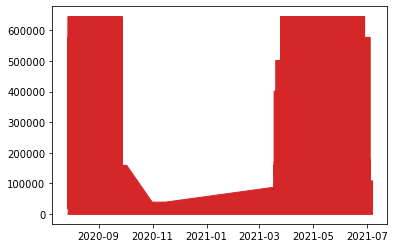

In [78]:
fig, am = plt.subplots()
am.fill_between(R_metropolitana["Date"], R_metropolitana["Poblacion"], color = 'tab:red')
plt.show()

In [79]:
Rios = com[com["codigo_region"] == 14]
Rios

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
303,14,Los Ríos,14102,Corral,Total,14102.0,5447.0,2020-07-28,4,2020-07-28
304,14,Los Ríos,14202,Futrono,Total,14202.0,15261.0,2020-07-28,4,2020-07-28
305,14,Los Ríos,14201,La Unión,Total,14201.0,39538.0,2020-07-28,4,2020-07-28
306,14,Los Ríos,14203,Lago Ranco,Total,14203.0,10292.0,2020-07-28,4,2020-07-28
307,14,Los Ríos,14103,Lanco,Total,14103.0,17652.0,2020-07-28,4,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168221,14,Los Ríos,14107,Paillaco,Total,14107.0,20798.0,2021-10-06,3,2021-10-06
168222,14,Los Ríos,14108,Panguipulli,Rural,14108.0,35991.0,2021-10-06,4,2021-10-06
168223,14,Los Ríos,14108,Panguipulli,Urbana,14108.0,35991.0,2021-10-06,4,2021-10-06
168224,14,Los Ríos,14204,Río Bueno,Total,14204.0,32925.0,2021-10-06,4,2021-10-06


In [80]:
R_rios = Rios[Rios["Fase"] == 1]
R_rios = R_rios.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_rios = R_rios.dropna()
R_rios

,Poblacion,Date
36975,39538.0,2020-10-31
36976,10292.0,2020-10-31
37361,39538.0,2020-11-01
37362,10292.0,2020-11-01
37747,39538.0,2020-11-02
...,...,...
148151,35991.0,2021-08-15
148536,35991.0,2021-08-16
148537,35991.0,2021-08-16
148922,35991.0,2021-08-17


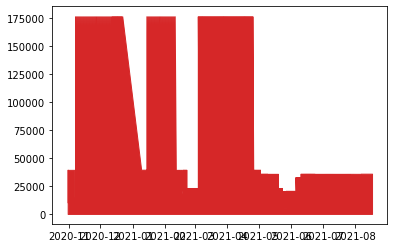

In [81]:
fig, an = plt.subplots()
an.fill_between(R_rios["Date"], R_rios["Poblacion"], color = 'tab:red')
plt.show()

In [82]:
Ñuble = com[com["codigo_region"] == 16]
Ñuble

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,Comuna_id,Poblacion,Fecha,Fase,Date
209,16,Ñuble,16102,Bulnes,Total,16102.0,22607.0,2020-07-28,3,2020-07-28
210,16,Ñuble,16101,Chillán,Rural,16101.0,198624.0,2020-07-28,3,2020-07-28
211,16,Ñuble,16101,Chillán,Urbana,16101.0,198624.0,2020-07-28,3,2020-07-28
212,16,Ñuble,16103,Chillán Viejo,Rural,16103.0,33827.0,2020-07-28,3,2020-07-28
213,16,Ñuble,16103,Chillán Viejo,Urbana,16103.0,33827.0,2020-07-28,3,2020-07-28
...,...,...,...,...,...,...,...,...,...,...
168137,16,Ñuble,16304,San Fabián,Total,16304.0,4654.0,2021-10-06,4,2021-10-06
168138,16,Ñuble,16108,San Ignacio,Total,16108.0,16624.0,2021-10-06,4,2021-10-06
168139,16,Ñuble,16305,San Nicolás,Total,16305.0,12172.0,2021-10-06,4,2021-10-06
168140,16,Ñuble,16207,Trehuaco,Total,16207.0,5696.0,2021-10-06,4,2021-10-06


In [83]:
R_ñuble = Ñuble[Ñuble["Fase"] == 1]
R_ñuble = R_ñuble.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
R_ñuble = R_ñuble.dropna()
R_ñuble

,Poblacion,Date
14107,198624.0,2020-09-02
14109,33827.0,2020-09-02
14493,198624.0,2020-09-03
14495,33827.0,2020-09-03
14879,198624.0,2020-09-04
...,...,...
129528,5414.0,2021-06-28
129912,28375.0,2021-06-29
129914,5414.0,2021-06-29
130298,28375.0,2021-06-30


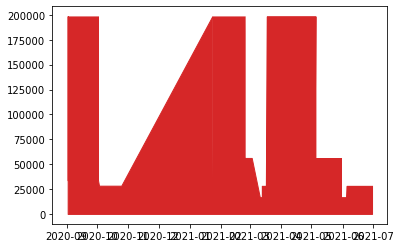

In [84]:
fig, añ = plt.subplots()
añ.fill_between(R_ñuble["Date"], R_ñuble["Poblacion"], color = 'tab:red')
plt.show()

In [85]:
Chile = com[com["Fase"] == 1]
Chile = Chile.drop(['codigo_region', 'region_residencia', 'codigo_comuna',"comuna_residencia","zona","Comuna_id","Fecha","Fase"], axis=1)
Chile = Chile.dropna()
Chile

,Poblacion,Date
1,247552.0,2020-07-28
5,129999.0,2020-07-28
9,223463.0,2020-07-28
12,17395.0,2020-07-28
14,425725.0,2020-07-28
...,...,...
148151,35991.0,2021-08-15
148536,35991.0,2021-08-16
148537,35991.0,2021-08-16
148922,35991.0,2021-08-17


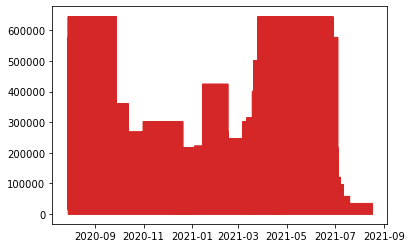

In [86]:
fig, ao = plt.subplots()
ao.fill_between(Chile["Date"], Chile["Poblacion"], color = 'tab:red')
plt.show()